We scrape Indeed.com for Research+Software+Engineer job postings.

In [ ]:
!python indeed_scraper.py

We have stored thew output in a list of strings in a pickled file all_text.txt.

In [4]:
# read pickled text
import pickle 
input_file = open('all_text.pkl','rb')
all_text = pickle.load(input_file)
print(len(all_text))

1000


 Let's look at one of them.

In [6]:
all_text[0]

u"Software Engineer (Artificial Intelligence Team) job - Skiltrek - Mountain View, CA | Indeed.com\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to Job Description, SearchClose\n\n\n\n\n\n\n\n\n\n\n\nFind JobsCompany ReviewsFind SalariesFind ResumesEmployers / Post Job\n\n\n\n\n\n\n\nUpload your resume\n\n\nSign in\n\n\n\n\n\n\n\n:\n\n\n\n\n\n\n\nWhat\nWhere\n\n\n\n\n\n\n\n\n\n\n\n\n\nAdvanced Job Search\n\n\n\njob title, keywords or company\n\n\ncity, state, or zip\n\n\n\n\n\n\n\n\n\n\n\n\nSoftware Engineer (Artificial Intelligence Team)\n\nSkiltrek\n     -\n\n\n\nPosition Summary:\nOur client's Artificial Intelligence Team is currently seeking a talented, competent, and highly motivated individual to join our group as a Software Engineer.\n\nThe successful candidate will develop our data process back-end system involving big data and will work closely with our data scientists to build machine learning systems for proof-of-concept prototypes or consumer-oriented services.\n\nRes

We see it is a Software Engineer job on an Artificiall Intelligence Team. The job does not have the full "Research Software Engineer" title, but may involve similar work.

### Word Cloud
To get a sense of what is in these ads we creat a word cloud of all the text.

In [7]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
import re
TAG_RE = re.compile(r'<[^>]+>')
all_text_cleaned = TAG_RE.sub(''," ".join(all_text))


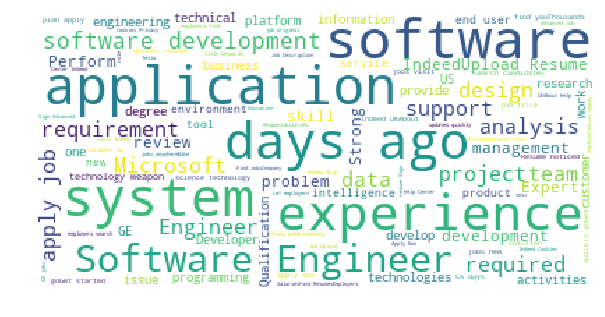

In [14]:
mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

# we remove som css keywords
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.add("Button")
stopwords.add("image")
stopwords.add("add")
stopwords.add("body")
stopwords.add("background-image")
stopwords.add("font")
stopwords.add("size")
stopwords.add("color")


# first we look at first 10 jobs
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(" ".join(all_text[:10]))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The result looks reasonable. Now let's look at all the adds.

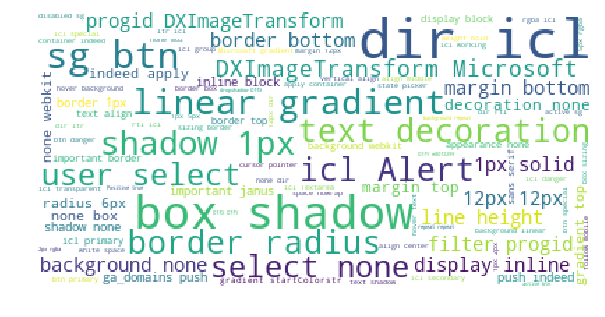

In [15]:
mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

# we remove som css keywords
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.add("Button")
stopwords.add("image")
stopwords.add("add")
stopwords.add("body")
stopwords.add("background-image")
stopwords.add("font")
stopwords.add("size")
stopwords.add("color")


# first we look at first 10 jobs
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(" ".join(all_text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We see a lot of css keywords, which we need to remove next.

In [16]:
# all_text_cleaned = [ad for ad in all_text if 'background-image' not in ad]

In [17]:
# len(all_text_cleaned)